Waves!
======

Imagine a pulse propagating in a string. As the wave travels each
segment of the string moves up and down perpendicular to the direction
of propagation. At the macroscopic level, we observe a transverse wave
that moves along the string, and the individual motion of the segments
is not relevant. In contrast, at the microscopic level, we see discrete
particles undergoing oscillatory motion perpendicular to the motion of
the wave.

In a string, or a solid, or a fluid, the collective motion of the
particles determine the velocity of sound in the medium, as well as the
thermal transport properties.

Coupled oscillators
-------------------

![springs](figures/springs.png)
#### Coupled oscillators in one dimension.

Let us first consider a one-dimensional chain of $N$ particles of mass
$m$ with equal equilibrium separation $a$. The particles are coupled to
massless springs with force constant $k_{c}$, except for the first and
last springs at the two ends of the chain which have spring constant
$k$. the individual displacement of the particle $i$ from its
equilibrium position along the $x$ axis is called $u_{i}$. The ends of
the fist and last spring are assumed fixed: $$u_{0}=u_{N+1}=0.$$ Since
the force of an individual mass is determined only by the compression or
expansion of the adjacent springs, the equation of motion for particle
$i$ is given by: $$\begin{eqnarray}
m\frac{d^{2}u_{i}}{dt^{2}} &=&-k_{c}(u_{i}-u_{i+1})-k_{c}(u_{i}-u_{i-1}) \\
&=&-k_{c}(2u_{i}-u_{i+1}-u_{i-1}).\end{eqnarray}$$

The equations for particles $i=1$ and $i=N$ next to the walls are given
by $$\begin{eqnarray}
m\frac{d^2u_1}{dt^2}&=&-k_c(u_1-u_2)-ku_1, \\
m\frac{d^2u_N}{dt^2}&=&-k_c(u_N-u_{N-1})-ku_N.\end{eqnarray}$$

Note that for $k_c=0$ all the equations will decouple and the motion of
the particles become independent of their neighbors. The above equations
describe longitudinal oscillations, *i. e.* motion along the direction
of the chain. The equations for transverse motion are equivalent.

### Exercise 5.1 

Write a generalization of the program for a mini solar system to describe the
motion of $N$ coupled linear oscillators.

### Exercise 5.2: two coupled oscillators 

1.  Use the previous program with $N=2$. Set the initial conditions $%
    u_{1}=0.5$ an $u_{2}=0$ and compute the time dependence of the
    displacements for $k=1,k_{c}=0.8$ and $k=k_{c}=1$. Remember that the
    mass of the particles has to be set to unity. Describe the
    qualitative behavior or the particles in each case. Is it possible
    to define a period of motion in the first case? What is the period
    in the second case?

2.  Set $k=1,k_{c}=0.2$. Since $k_{c}<k$, we can describe the springs as
    being “weakly coupled”. Observe the time dependence of the
    displacement of particle one. Can you identify two kinds of
    oscillations superimposed on upon each other? What is the time
    between the oscillations of the amplitude? What is the time between
    the zeroes of the displacement? Compute the corresponding angular
    frequency of each oscillation. How does the displacement of particle
    2 correspond to that of particle 1? Determine the qualitative
    changes in the frequencies of each oscillation for $k_{c}=1$.

3.  Choose the initial conditions $u_{1}=u_{2}=0.5$ so that both
    particles have the same initial displacements, Set $k_{c}=0.1$ and
    $k=1$ and describe the motion. Compute the total energy of each
    particle as a function of time and describe its
    qualitative behavior. Does the period of motion depend on $k_{c}$?
    What if the dependence of the period on $k$?

4.  Consider the initial conditions $u_{1}=-u_{2}=0.5$ so that both
    particles have equal but opposite initial displacements. Is there a
    simple sinusoidal oscillation in this case? Compute the period
    $T_{1}$ for ${%
    k=1,k_{c}=1}$, ${k=2,k_{c}=1}$, and ${k=1,k_{c}=2}$. Analyze your
    results for $\omega _{1}^{2}$ and determine its dependence on $k$
    and $k_{c}$. What is the behavior of the energy of each particle as
    a function of time?



In [20]:
class particle(object):  ## We recycle our 1D particle object
    
    def __init__(self, mass=1., x=0., v=0.):
        self.mass = mass
        self.f = 0
        self.y = x
        self.v = v

        
    def move(self, dt):
        # Euler-Cromer
        self.v = self.v + self.f/self.mass*dt
        self.x = self.x + self.v*dt
        
class CoupledSystem(object):

    def __init__(self, N, k, kc, dt, w0=0, A=0): 
        self.N = N
        self.dt = dt
        self.k = k
        self.kc = kc
        self.w0 = w0
        self.Amp = A
        self.t = 0
        self.particles = [particle()]
        for i in range(1,N):
            self.particles.append(particle()) # we create a list of N particles

    def evolve(self):        
        # Compute the interaction forces with the other particles
        for i in range(self.N-1):
            self.particles[i].f = self.kc*(self.particles[i+1].x + self.particles[i-1].x - 2*self.particles[i].x)
        self.particles[0].f = self.kc*(self.particles[1].x - self.particles[0].x) - self.k*self.particles[0].x+ self.Amp*math.sin(self.w0*self.t)
        self.particles[N-1].f = self.kc*(self.particles[N-2].x - self.particles[N-1].x) - self.k*self.particles[N-1].x
        self.t +=dt
        for p in self.particles:
            p.move(dt)
            
    def energy(self):
        # Challenge
        return (ke,pe)


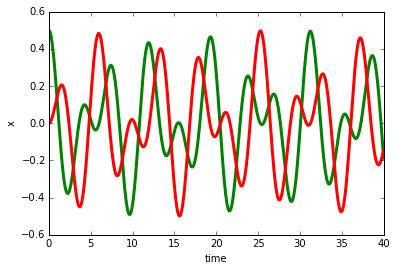

In [21]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
import math

N = 2
k = 1.0
kc = 0.8
dt = 0.01
tmax = 40
nsteps = int(tmax/dt)

S = CoupledSystem(N, k, kc, dt,0,0)
S.particles[0].x = 0.5
S.particles[1].x = 0.

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve()

pyplot.plot(t, x[0,], color='green', ls='-', lw=3)
pyplot.plot(t, x[1,], color='red', ls='-', lw=3)

pyplot.xlabel('time')
pyplot.ylabel('x');

We will now calculate the power spectrum and determine the natural frequencies by using the numpy FFT module. The frequency interval is given by 
$$\Delta \omega = \frac{1}{N_{steps}\Delta t}$$

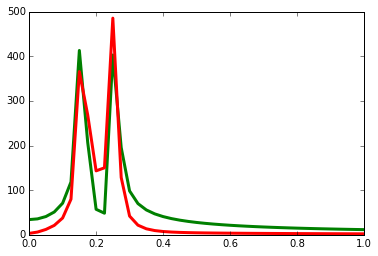

In [22]:
w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])

#w = np.fft.fftshift(w)  # We shift the indices to center the frequencies at zero
#u0 = np.fft.fftshift(u0)
#u1 = np.fft.fftshift(u1)

pyplot.plot(w, abs(u0), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='red', ls='-', lw=3)
pyplot.xlim(0,1);

### Exercise 5.5: three coupled oscillators 

1.  Run the program with $N=3$, $k_{c}=0.2$ and $k=1$ and arbitrary but
    nonzero initial displacements. Describe the time-dependence of the
    motion of the particles.

2.  Consider the following initial conditions:
    ${u_{1}=u_{2}=u_{3}=0.5}$, ${u_{1}=0.5,u_{2}=-0.5,u_{3}=0.5}$,
    ${u_{1}=0.5,u_{2}=0,u_{3}=-0.5}$ (all the velocities are
    initially zero) If these initial conditions correspond to normal
    modes, determine the normal modes frequencies.

3.  Add an external driving force to particle 1 and determine the normal
    mode frequencies. Compare your results with the frequencies you
    obtained in part 2. How many normal modes are there?


particle 1 frequency
0.175
particle 2 frequency
0.1
particle 3 frequency
0.175


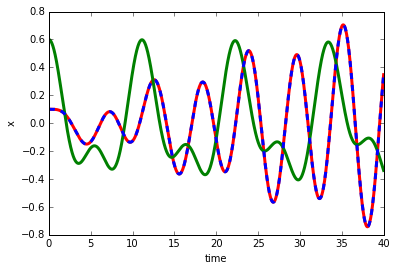

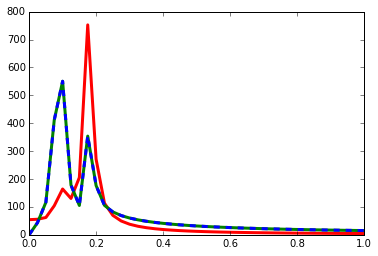

In [23]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

def fft_peak(w,fft):
    fft=abs(fft)
    peak=[0,0]
    for ii in range(1,len(fft)-1):
        if fft[ii]>peak[1]:
            peak[1]=fft[ii]
            peak[0]=w[ii]
    return peak

N = 3
k = 1.0
kc = 0.2
dt = 0.01
tmax = 40
nsteps = int(tmax/dt)



S = CoupledSystem(N, k, kc, dt, 0)
S.particles[0].x = 0.1
S.particles[1].x = .6
S.particles[2].x = -.9

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve()

pyplot.plot(t, x[0,], color='red', ls='-', lw=3)
pyplot.plot(t, x[1,], color='green', ls='-', lw=3)
pyplot.plot(t, x[0,], color='blue', ls='--', lw=3)

pyplot.xlabel('time')
pyplot.ylabel('x');


w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,])

#w = np.fft.fftshift(w)  # We shift the indices to center the frequencies at zero
#u0 = np.fft.fftshift(u0)
#u1 = np.fft.fftshift(u1)
pyplot.figure()
pyplot.plot(w, abs(u0), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='blue', ls='--', lw=3)
pyplot.xlim(0,1);

print "particle 1 frequency"
print fft_peak(w, u0)[0]
print "particle 2 frequency"
print fft_peak(w, u1)[0]
print "particle 3 frequency"
print fft_peak(w, u2)[0]

particle 1 frequency
0.175
particle 2 frequency
0.1
particle 3 frequency
0.175


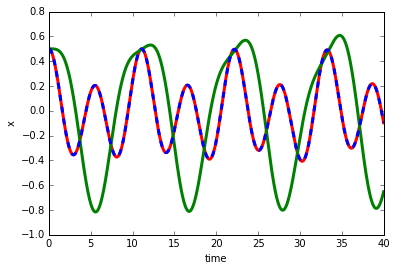

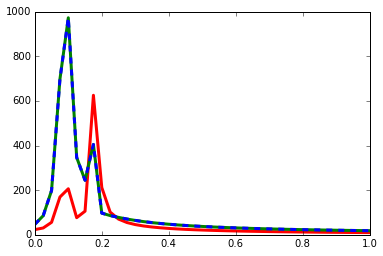

In [24]:

N = 3
k = 1.0
kc = 0.2
dt = 0.01
tmax = 40
nsteps = int(tmax/dt)



S = CoupledSystem(N, k, kc, dt,0)
S.particles[0].x = 0.5
S.particles[1].x = 0.5
S.particles[2].x = 0.5

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve()

pyplot.plot(t, x[0,], color='red', ls='-', lw=3)
pyplot.plot(t, x[1,], color='green', ls='-', lw=3)
pyplot.plot(t, x[0,], color='blue', ls='--', lw=3)

pyplot.xlabel('time')
pyplot.ylabel('x');


w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,])

#w = np.fft.fftshift(w)  # We shift the indices to center the frequencies at zero
#u0 = np.fft.fftshift(u0)
#u1 = np.fft.fftshift(u1)
pyplot.figure()
pyplot.plot(w, abs(u0), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='blue', ls='--', lw=3)
pyplot.xlim(0,1);

print "particle 1 frequency"
print fft_peak(w, u0)[0]
print "particle 2 frequency"
print fft_peak(w, u1)[0]
print "particle 3 frequency"
print fft_peak(w, u2)[0]

particle 1 frequency
0.175
particle 2 frequency
0.175
particle 3 frequency
0.175


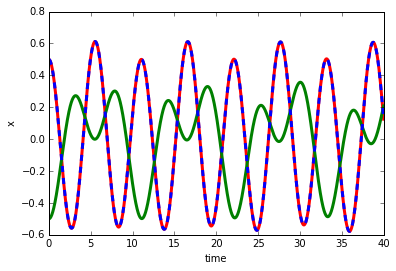

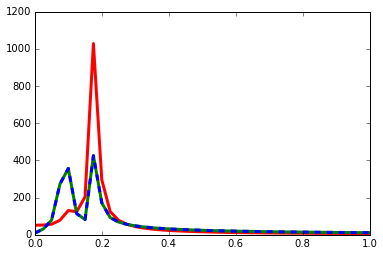

In [25]:
N = 3
k = 1.0
kc = 0.2
dt = 0.01
tmax = 40
nsteps = int(tmax/dt)

S = CoupledSystem(N, k, kc, dt,0)
S.particles[0].x = 0.5
S.particles[1].x = -0.5
S.particles[2].x = 0.5

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve()

pyplot.plot(t, x[0,], color='red', ls='-', lw=3)
pyplot.plot(t, x[1,], color='green', ls='-', lw=3)
pyplot.plot(t, x[0,], color='blue', ls='--', lw=3)

pyplot.xlabel('time')
pyplot.ylabel('x');


w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,])

#w = np.fft.fftshift(w)  # We shift the indices to center the frequencies at zero
#u0 = np.fft.fftshift(u0)
#u1 = np.fft.fftshift(u1)
pyplot.figure()
pyplot.plot(w, abs(u0), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='blue', ls='--', lw=3)
pyplot.xlim(0,1);

print "particle 1 frequency"
print fft_peak(w, u0)[0]
print "particle 2 frequency"
print fft_peak(w, u1)[0]
print "particle 3 frequency"
print fft_peak(w, u2)[0]

particle 1 frequency
0.175
particle 2 frequency
0
particle 3 frequency
0.175


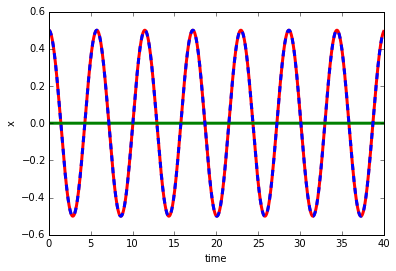

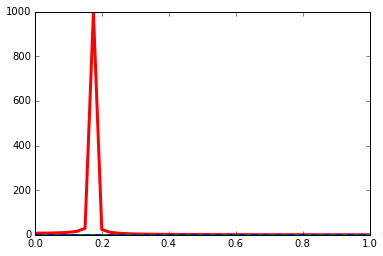

In [26]:
N = 3
k = 1.0
kc = 0.2
dt = 0.01
tmax = 40
nsteps = int(tmax/dt)

S = CoupledSystem(N, k, kc, dt,0)
S.particles[0].x = 0.5
S.particles[1].x = 0
S.particles[2].x = -0.5

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve()

pyplot.plot(t, x[0,], color='red', ls='-', lw=3)
pyplot.plot(t, x[1,], color='green', ls='-', lw=3)
pyplot.plot(t, x[0,], color='blue', ls='--', lw=3)

pyplot.xlabel('time')
pyplot.ylabel('x');


w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,])

#w = np.fft.fftshift(w)  # We shift the indices to center the frequencies at zero
#u0 = np.fft.fftshift(u0)
#u1 = np.fft.fftshift(u1)
pyplot.figure()
pyplot.plot(w, abs(u0), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='blue', ls='--', lw=3)
pyplot.xlim(0,1);
print "particle 1 frequency"
print fft_peak(w, u0)[0]
print "particle 2 frequency"
print fft_peak(w, u1)[0]
print "particle 3 frequency"
print fft_peak(w, u2)[0]

The 1st and 2nds sets of initial conditions do not yield single modes but rather a combination of the normal modes for the system. Using arbitrary initial conditions, we can find the peaks in the fft plot to find the frequencies of all 3 modes.

particle 1 frequency
0.175
particle 2 frequency
0.1
particle 3 frequency
0.175


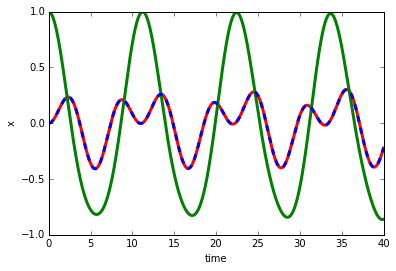

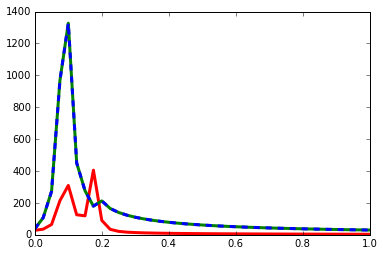

In [34]:
S = CoupledSystem(N, k, kc, dt,0)
S.particles[0].x = 0
S.particles[1].x =1
S.particles[2].x = 0

t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve()

pyplot.plot(t, x[0,], color='red', ls='-', lw=3)
pyplot.plot(t, x[1,], color='green', ls='-', lw=3)
pyplot.plot(t, x[0,], color='blue', ls='--', lw=3)

pyplot.xlabel('time')
pyplot.ylabel('x');


w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,])

#w = np.fft.fftshift(w)  # We shift the indices to center the frequencies at zero
#u0 = np.fft.fftshift(u0)
#u1 = np.fft.fftshift(u1)
pyplot.figure()
pyplot.plot(w, abs(u0), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='blue', ls='--', lw=3)
pyplot.xlim(0,1);
print "particle 1 frequency"
print fft_peak(w, u0)[0]
print "particle 2 frequency"
print fft_peak(w, u1)[0]
print "particle 3 frequency"
print fft_peak(w, u2)[0]

particle 1 frequency
0.025
particle 2 frequency
0.025
particle 3 frequency
0.175


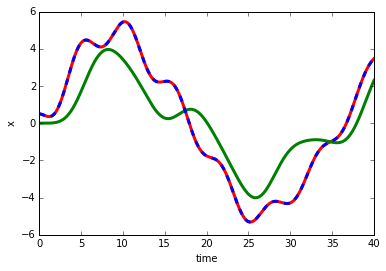

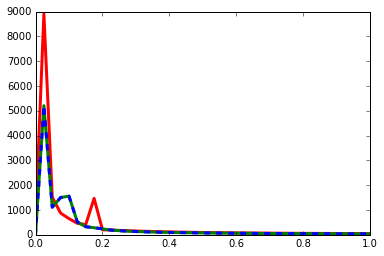

In [32]:
##With driving force or A*sin(w0*t) on particle 1
N = 3
k = 1.0
kc = 0.2
dt = 0.01
tmax = 40
nsteps = int(tmax/dt)


S = CoupledSystem(N, k, kc, dt,.175, 5)
S.particles[0].x = 0.5
S.particles[1].x = 0
S.particles[2].x = -.5


t = np.linspace(0.,tmax,nsteps)
x = np.zeros(shape=(N,nsteps))

for i in range(nsteps):
    for n in range(S.N):
        x[n,i] = S.particles[n].x
    S.evolve()

pyplot.plot(t, x[0,], color='red', ls='-', lw=3)
pyplot.plot(t, x[1,], color='green', ls='-', lw=3)
pyplot.plot(t, x[0,], color='blue', ls='--', lw=3)

pyplot.xlabel('time')
pyplot.ylabel('x');


w = np.fft.rfftfreq(nsteps,dt)
u0 = np.fft.rfft(x[0,])
u1 = np.fft.rfft(x[1,])
u2 = np.fft.rfft(x[2,])

#w = np.fft.fftshift(w)  # We shift the indices to center the frequencies at zero
#u0 = np.fft.fftshift(u0)
#u1 = np.fft.fftshift(u1)
pyplot.figure()
pyplot.plot(w, abs(u0), color='red', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='green', ls='-', lw=3)
pyplot.plot(w, abs(u1), color='blue', ls='--', lw=3)
pyplot.xlim(0,1);
print "particle 1 frequency"
print fft_peak(w, u0)[0]
print "particle 2 frequency"
print fft_peak(w, u1)[0]
print "particle 3 frequency"
print fft_peak(w, u2)[0]




With the driving force, there is a new normal mode at the driving frequency.